**Predictive modeling of customer bookings**

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

**Exploratory data analysis**

To better grasp what we have and the dataset's statistical characteristics, we must first examine the data.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="latin-1")

In [4]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [5]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df.shape

(50000, 14)

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


We may get an overview of the descriptive statistics for the whole dataset using the.describe() method (which is limited to numeric columns). This provides us with a brief summary of several parameters, including the mean, minimum, maximum, and general distribution of every column.

You should now proceed to explore the dataset using additional metrics and visualisations that you believe could be helpful. Next, get your dataset ready for predictive modeling. Lastly, you should use performance metrics to assess your machine learning model, train it, and provide visual representations of the relevant variables. You should condense all of this analysis into a single slide.


In [9]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [11]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [12]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [13]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [14]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

**Make a new feature**

Because we want to know customer behavior to have a trip on holiday (weekend), so let's make a feature called is_weekend. if the flight day is Saturday or Sunday we give is_weekend value = 1, for another flight day we give it 0

In [15]:
df['is_weekend'] = df['flight_day'].map({6: 1, 7: 1}).fillna(0).astype(int)
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


**Analyze data**

Let's see how many passenger that have a flight in the weekend

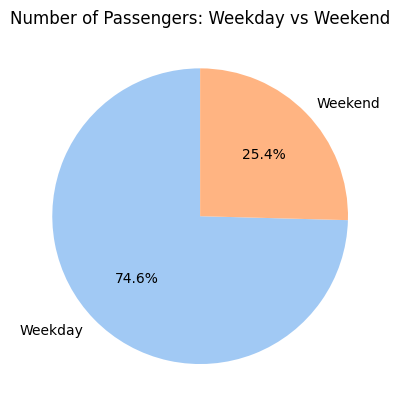

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'is_weekend' and summing up the 'num_passengers'
weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()

# Creating labels for the pie chart
labels = ['Weekday', 'Weekend']  # Assuming 0 = Weekday and 1 = Weekend

# Creating the pie chart
plt.pie(weekend['num_passengers'], labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

# Adding a title
plt.title('Number of Passengers: Weekday vs Weekend')

# Displaying the pie chart
plt.show()

The average number of passengers per day:

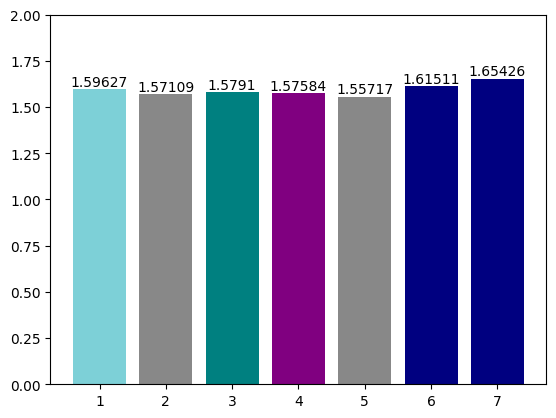

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping the data by 'flight_day' and calculating the mean of 'num_passengers'
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

# Defining a color palette for each day of the week
colors = ['#7DD0D7', '#888888', '#008080', '#800080', '#888888', '#000080', '#000080']

# Plotting the bar chart
fig, ax = plt.subplots()

# Applying the colors to each bar
bars = ax.bar(dayperday['flight_day'], dayperday['num_passengers'], color=colors)

# Adding bar labels
ax.bar_label(bars)

# Setting the y-axis limit
plt.ylim(0, 2)

# Displaying the plot
plt.show()


Weekends have fewer passengers than weekdays, as the two graphs above show, but when we compare the average number of passengers, weekends have a greater value than weekdays. This suggests that we should monitor the number of flights on a daily basis.

In [18]:
df['flight_day'].value_counts().reset_index().sort_values(by='flight_day')

,flight_day,count
0,1,8102
2,2,7673
1,3,7674
3,4,7424
4,5,6761
6,6,5812
5,7,6554


In [19]:
route = (df.loc[df['is_weekend'] == 1]
         .groupby('route')['num_passengers']
         .sum()
         .reset_index()
         .sort_values(by='num_passengers', ascending=False))

In [20]:
route[:10]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306
256,DPSICN,275
157,CTSDMK,264
377,ICNSYD,260
264,DPSPVG,255
151,COKSYD,250


The top five routes with the highest number of passengers are shown in the table above, thus my suggestion is to increase the number of flights to these five destinations on the weekends.

**Make a machine learning Model**

**Data Preparation**

**Drop columns that has many unique values**

In [21]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [22]:
df.drop('route',axis=1, inplace=True)

In [23]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

The booking origin column likewise contains a number of unique values. However, I will alter the value of the booking origin—which was originally the name of the country—to the name of the continent since I don't want to remove the information about the booking's origin.



In [24]:
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.6/231.6 kB 32.0 MB/s eta 0:00:00


In [25]:
import pycountry_convert as pc

# Replace 'Myanmar (Burma)' with 'Myanmar'
df['booking_origin'] = df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

# Create a dictionary to map country names to continent codes
country_to_continent = {}
for country in df['booking_origin'].unique():
    try:
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        country_to_continent[country] = continent_code
    except:
        country_to_continent[country] = 'Others'

# Map country names to continent codes using the dictionary
df['booking_continent'] = df['booking_origin'].map(country_to_continent)

In [26]:
df['booking_continent'].value_counts()

booking_continent
AS        29740
OC        18960
EU          578
NA          525
Others       87
AF           69
SA           41
Name: count, dtype: int64

In [27]:
df.drop('booking_origin',axis=1, inplace=True)

**Data Cleaning**

In [28]:
df.sample()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent
9114,1,Internet,RoundTrip,54,28,6,6,1,0,0,8.83,0,1,OC


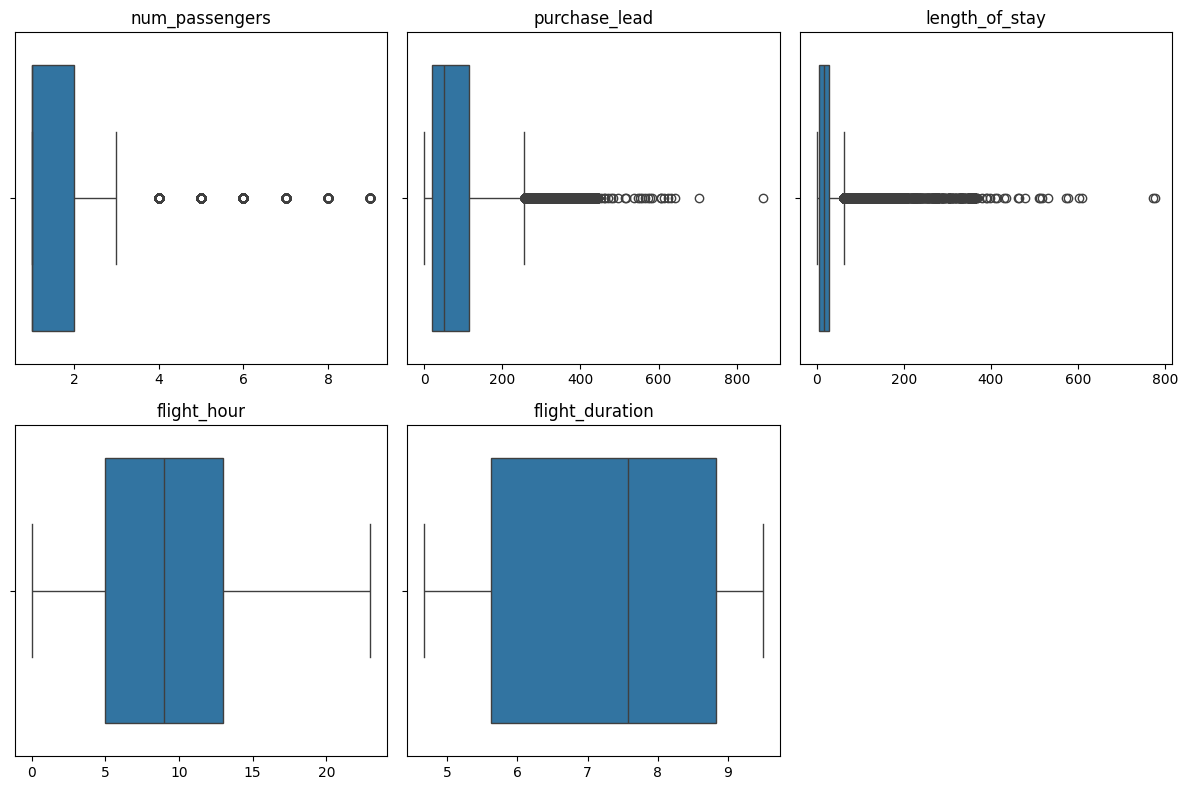

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12, 8))

for i, column in enumerate(num, 1):
    plt.subplot(2, 3, i)  # Adjust the layout to fit 5 plots
    sns.boxplot(data=df, x=column)
    plt.title(column)
    plt.xlabel('')  # Remove x-axis label for cleaner look
    plt.ylabel('')  # Remove y-axis label for cleaner look

plt.tight_layout()
plt.show()


As we can see, there are a lot of outlier values for length of stay and purchase lead. To reduce the number of wasted columns, we will remove the outlier using zscore.

In [30]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(df)}')

# Calculate z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df[num]))

# Create a boolean mask to identify outliers
outlier_mask = (z_scores < 3).all(axis=1)

# Filter the DataFrame using the mask
df = df[outlier_mask]

print(f'Total rows after delete outlier : {len(df)}')


Total rows before delete outlier : 50000
Total rows after delete outlier : 47137


**Feature Transformation**

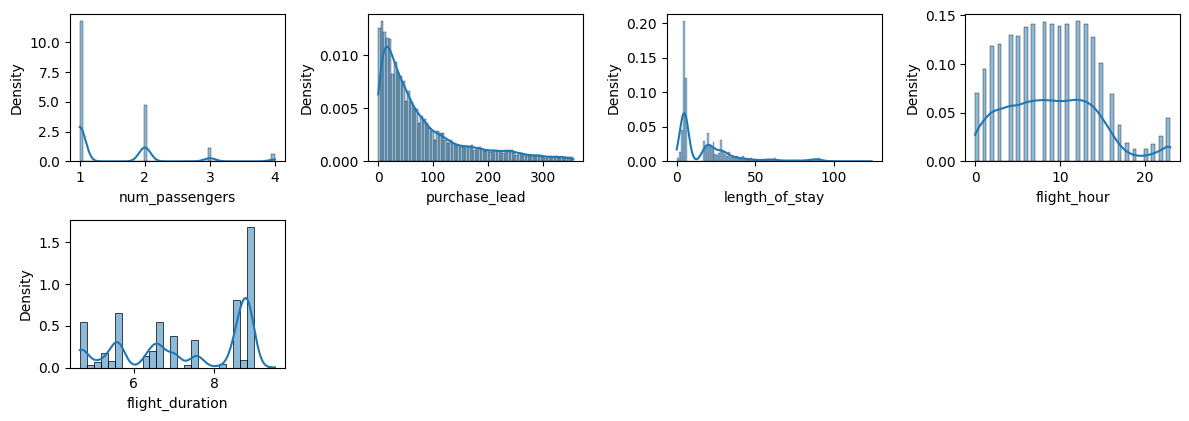

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, column in enumerate(df[num].columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df[num], x=df[column], kde=True, stat="density", fill=True)
    plt.tight_layout()

plt.show()

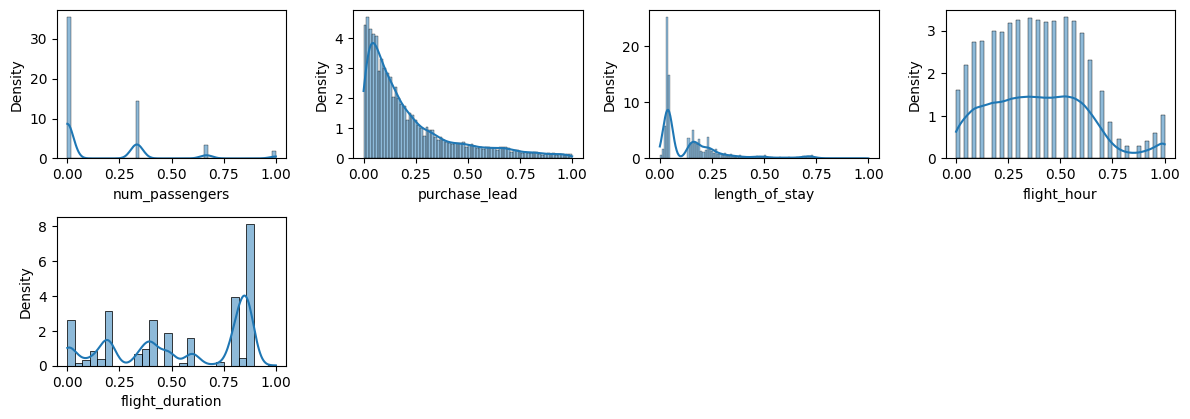

In [32]:
from sklearn.preprocessing import Normalizer

num_max = df[num].max()
num_min = df[num].min()

num_features = (df[num] - num_min) / (num_max - num_min)
df[num] = num_features

plt.figure(figsize=(12, 8))

for i, column in enumerate(df[num].columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=df[column], kde=True, stat="density", fill=True)
    plt.tight_layout()

plt.show()


**Feature Encoding**

In [33]:
from sklearn.preprocessing import LabelEncoder

# Mapping trip_type
df['trip_type'] = df['trip_type'].apply(lambda x: {'RoundTrip': 0, 'OneWay': 1, 'CircleTrip': 2}[x])

# Encoding sales_channel with LabelEncoder
le = LabelEncoder()
df['sales_channel'] = le.fit_transform(df['sales_channel'])

# One-hot encoding booking_continent
df = df.join(pd.get_dummies(df['booking_continent'], prefix='booking_continent')).drop('booking_continent', axis=1)


In [34]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_Others,booking_continent_SA
0,0.333333,0,0,0.735955,0.153226,0.304348,6,1,0,0,0.175983,0,1,False,False,False,False,True,False,False
1,0.000000,0,0,0.314607,0.161290,0.130435,6,0,0,0,0.175983,0,1,False,False,False,False,True,False,False
2,0.333333,0,0,0.682584,0.177419,0.739130,3,1,1,0,0.175983,0,0,False,True,False,False,False,False,False
3,0.000000,0,0,0.269663,0.250000,0.173913,6,0,0,1,0.175983,0,1,False,False,False,False,True,False,False
4,0.333333,0,0,0.191011,0.177419,0.652174,3,1,0,1,0.175983,0,0,False,True,False,False,False,False,False


**Split Data**

****

In [35]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['booking_complete'], axis=1)
y = df['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
# Using to_dict for a different representation
normalized_value_counts = y_train.value_counts(normalize=True).to_dict()

In [37]:
y_train.value_counts(normalize=True)

booking_complete
0    0.85115
1    0.14885
Name: proportion, dtype: float64

**Sampling Data**

**Over sampling**

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_train = imputer.fit_transform(x_train)

In [39]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=2)
x_over, y_over = adasyn.fit_resample(x_train, y_train.ravel())

In [40]:
pd.isnull(x_train).sum().sum()

0

In [41]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

**Train the model**

In [42]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)


    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

Accuracy (Test Set): 0.85
Precision (Test Set): 0.43
Recall (Test Set): 0.05
F1-Score (Test Set): 0.09
roc_auc (test-proba): 0.52
roc_auc (train-proba): 0.54


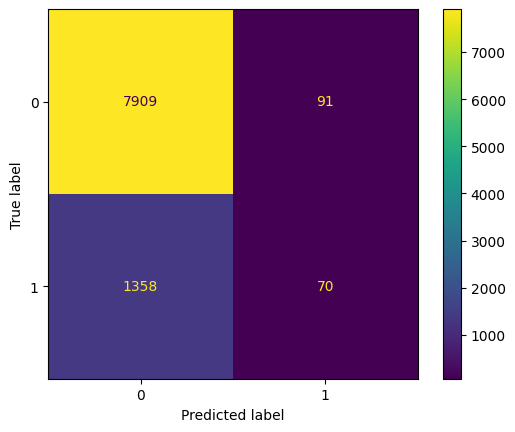

In [43]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [44]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.28
Recall (Test Set): 0.21
F1-Score (Test Set): 0.24
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.99


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

try:
    # Make predictions
    predictions = xg_tuned.predict(x_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    print(conf_matrix)

    # Print classification report
    print(classification_report(y_test, predictions))
except Exception as e:
    print(f"An error occurred: {e}")


[[7242  758]
 [1129  299]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.88      8000
           1       0.28      0.21      0.24      1428

    accuracy                           0.80      9428
   macro avg       0.57      0.56      0.56      9428
weighted avg       0.78      0.80      0.79      9428



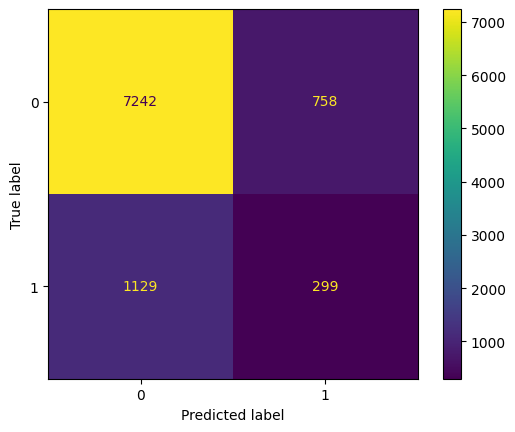

In [47]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)

XGBoost with hyperparameter have a better prediction.

**Feature Importance**

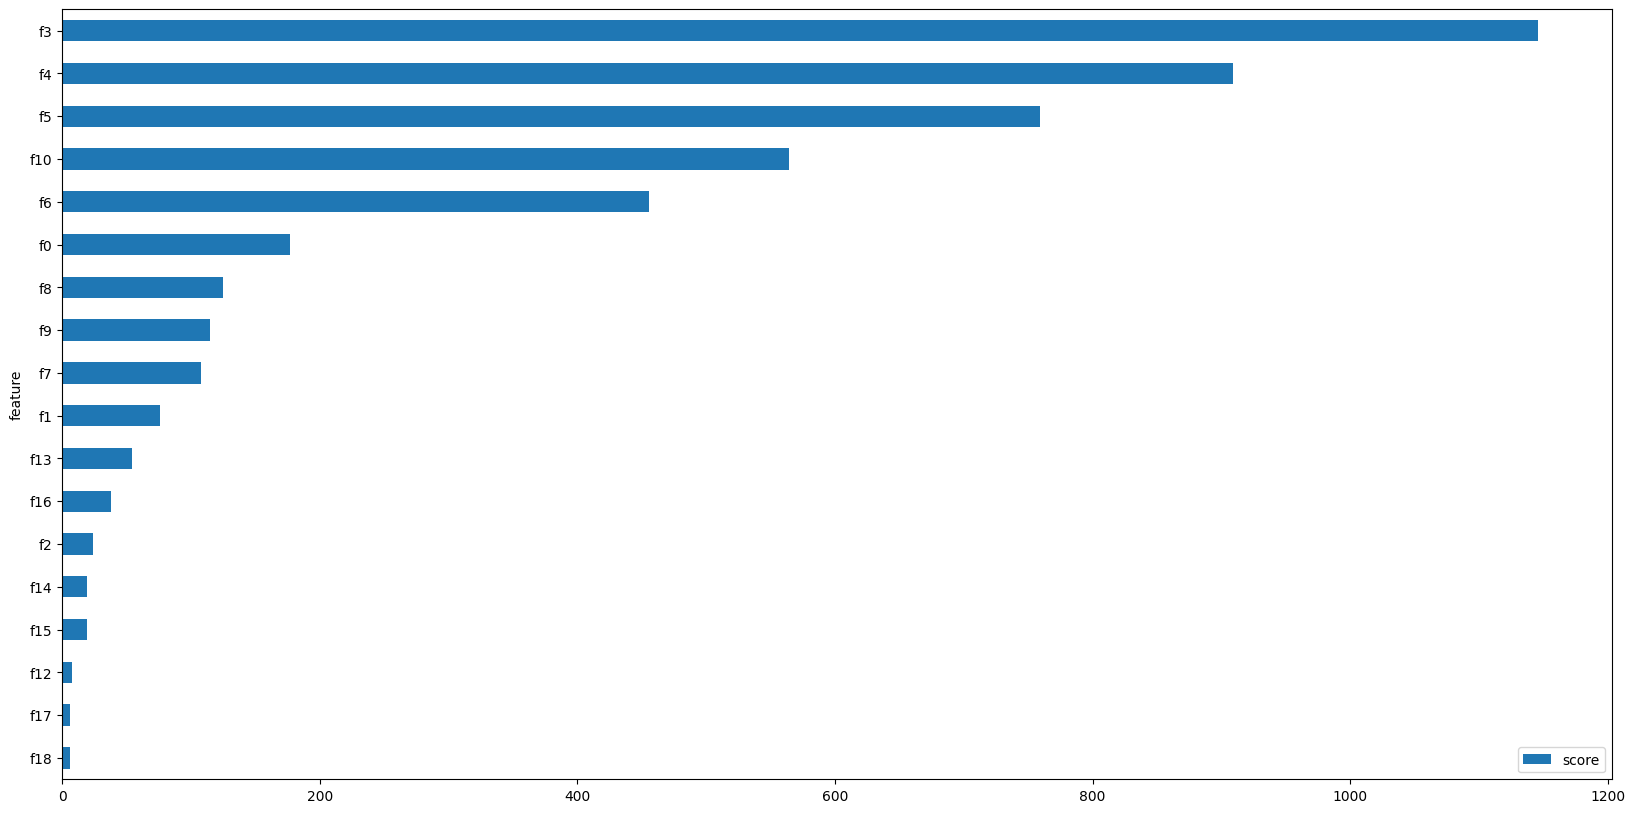

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract and process feature importance
feature_importance = clf.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame.from_dict(feature_importance, orient='index', columns=['score'])
importance_df.index.name = 'feature'
importance_df = importance_df.reset_index()

# Sort and plot top 40 features
top_features = importance_df.nlargest(40, 'score').sort_values(by='score', ascending=True)
top_features.plot(kind='barh', x='feature', y='score', figsize=(20, 10))
plt.show()
